In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_practise3/termdeposit_train.csv')

# Exploratory Data Analysis

In [9]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
df.shape

(31647, 18)

In [46]:
# Removing ID column:
df=df.drop(columns=['ID'],axis=1)
df=df.drop(columns=['pdays'],axis=1)

In [47]:
df.shape

(31647, 16)

In [48]:
df.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [49]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

In [50]:
df.describe

<bound method NDFrame.describe of        age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0        0   
31645   57    9        1          1        0      225        1     0        1   
31646   55    4        0          1        0      204        1     0       

In [51]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int32
 2   marital     31647 non-null  int32
 3   education   31647 non-null  int32
 4   default     31647 non-null  int32
 5   balance     31647 non-null  int64
 6   housing     31647 non-null  int32
 7   loan        31647 non-null  int32
 8   contact     31647 non-null  int32
 9   day         31647 non-null  int64
 10  month       31647 non-null  int32
 11  duration    31647 non-null  int64
 12  campaign    31647 non-null  int64
 13  previous    31647 non-null  int64
 14  poutcome    31647 non-null  int32
 15  subscribed  31647 non-null  int32
dtypes: int32(10), int64(6)
memory usage: 2.7 MB


In [53]:
# Encoding the columns

from sklearn.preprocessing import LabelEncoder

In [19]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']].apply(LabelEncoder().fit_transform)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [55]:
df.shape

(31647, 16)

In [56]:
df.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

In [57]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,275.000000,3.000000,1.000000


In [58]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.048752,0.077586,-0.029600


# Data Visualization

0    27932
1     3715
Name: subscribed, dtype: int64


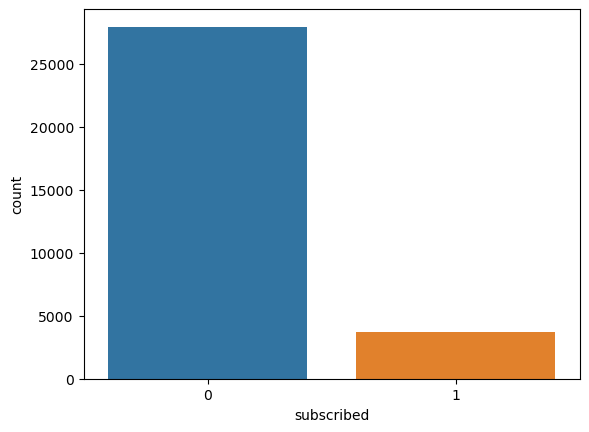

In [59]:
# Visualizing the count of Subscribed
print(df['subscribed'].value_counts())
ax=sns.countplot(x='subscribed',data=df)
plt.show()

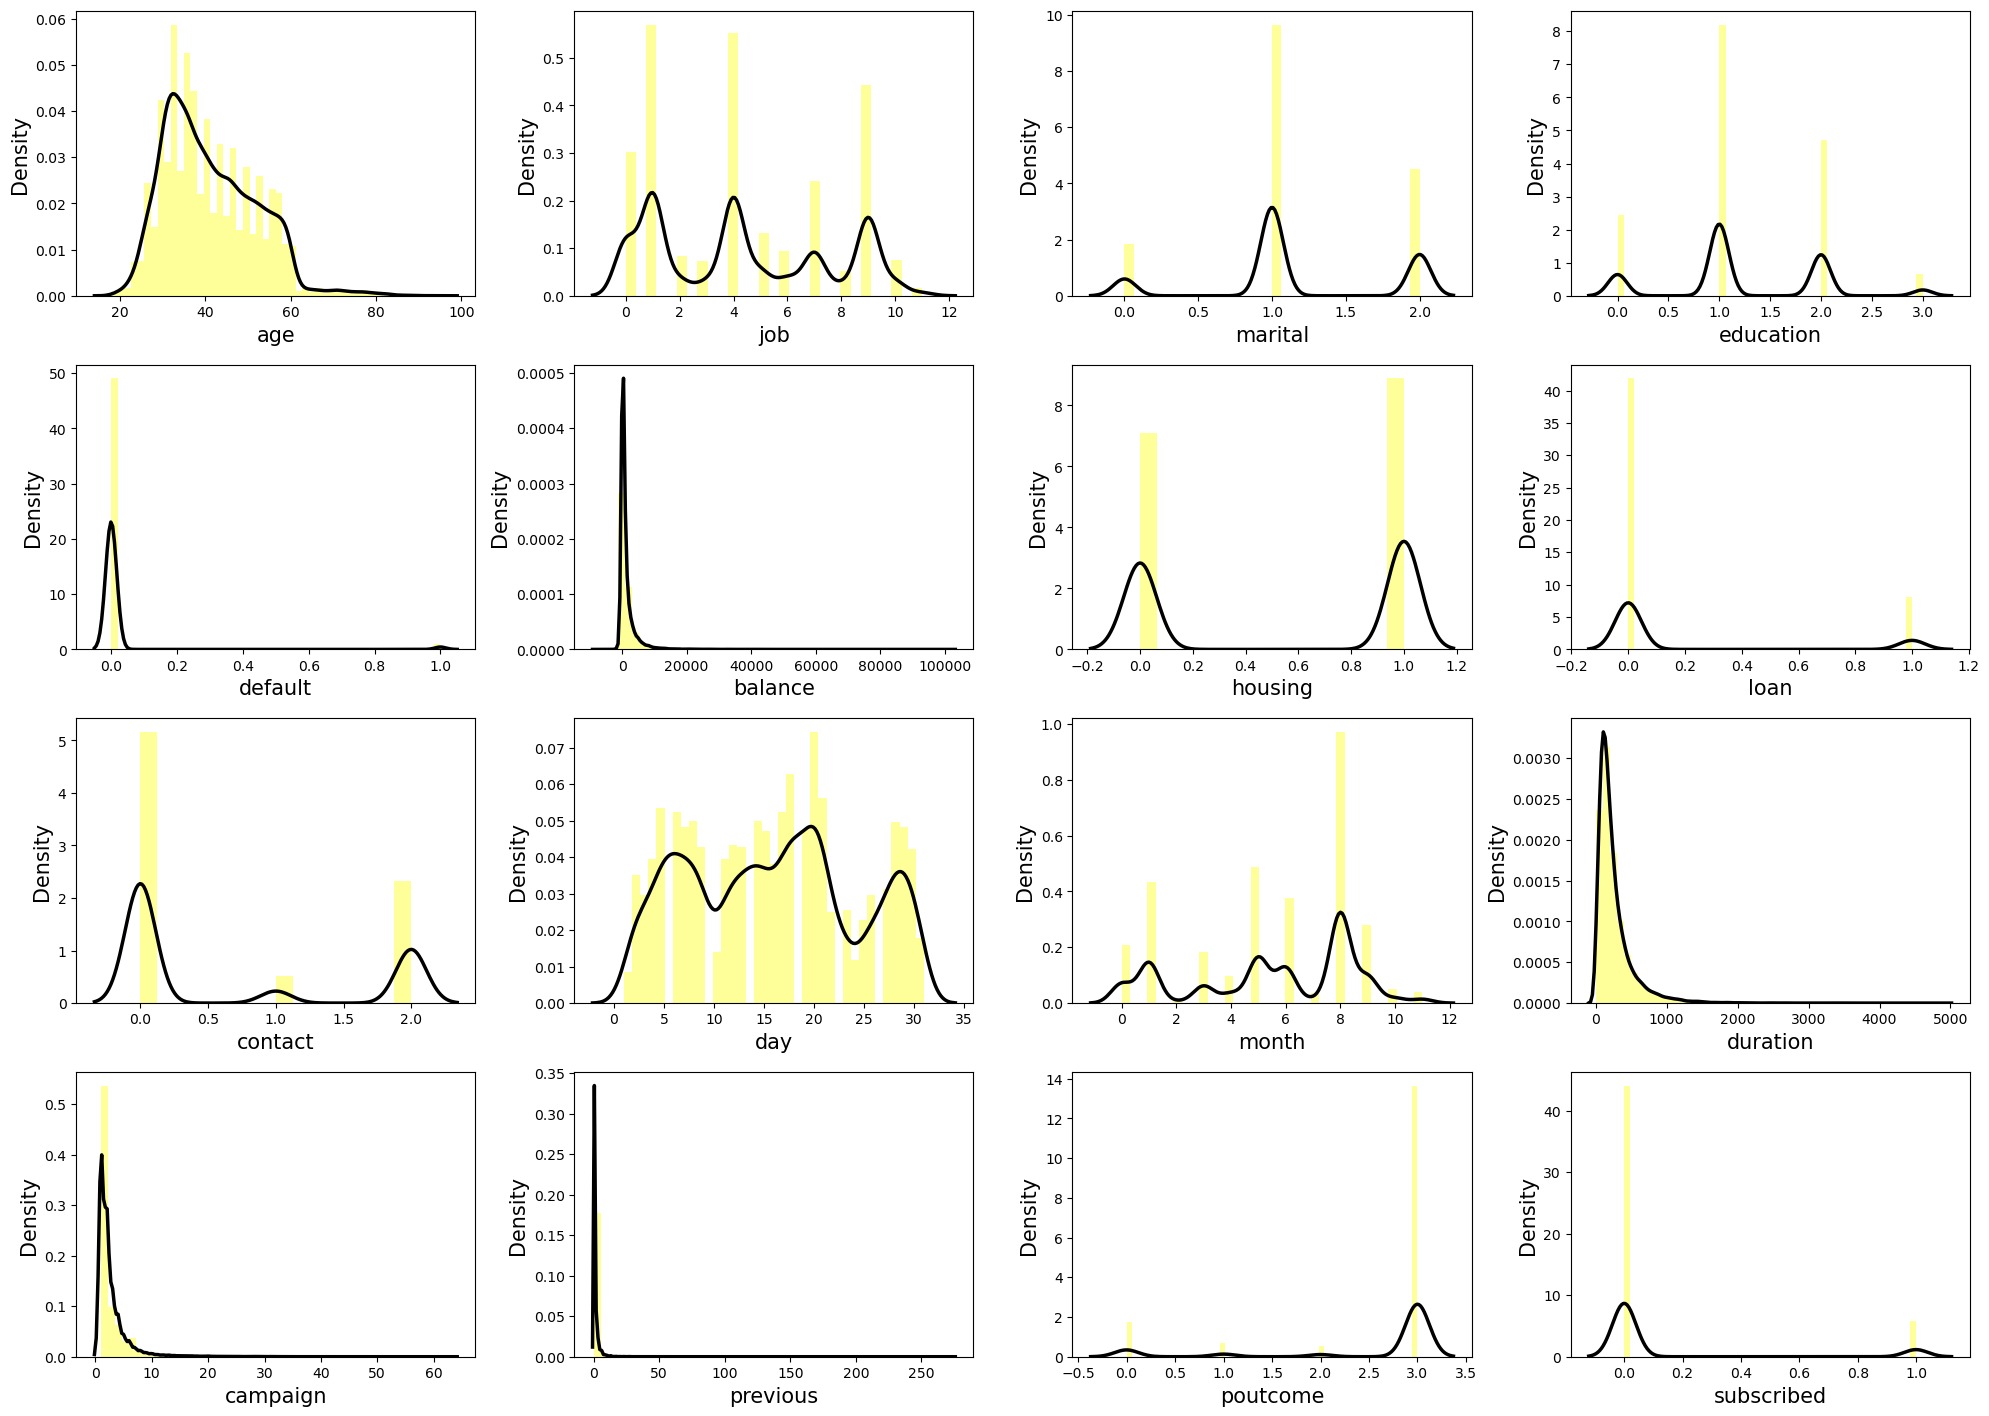

In [60]:
plt.figure(figsize=(20,35), facecolor='white')
plotnum= 1
for column in df.columns:
    if plotnum<=26:
        ax= plt.subplot(10,4, plotnum)
        sns.distplot(df[column], color='yellow',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 15)
        plt.ylabel('Density', fontsize= 15)
    plotnum+=1
plt.tight_layout()

<Axes: >

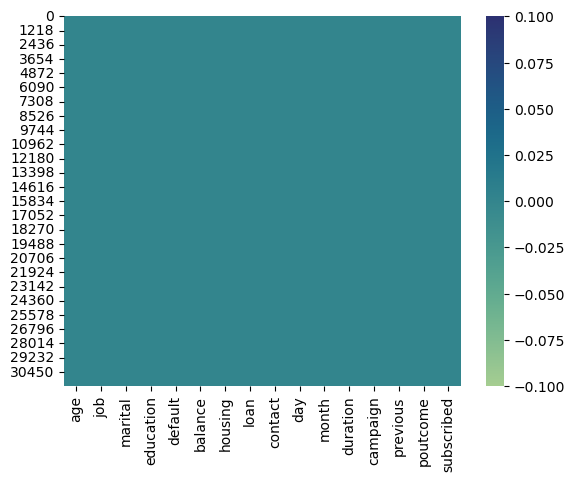

In [61]:
sns.heatmap(df.isnull(),cmap='crest')

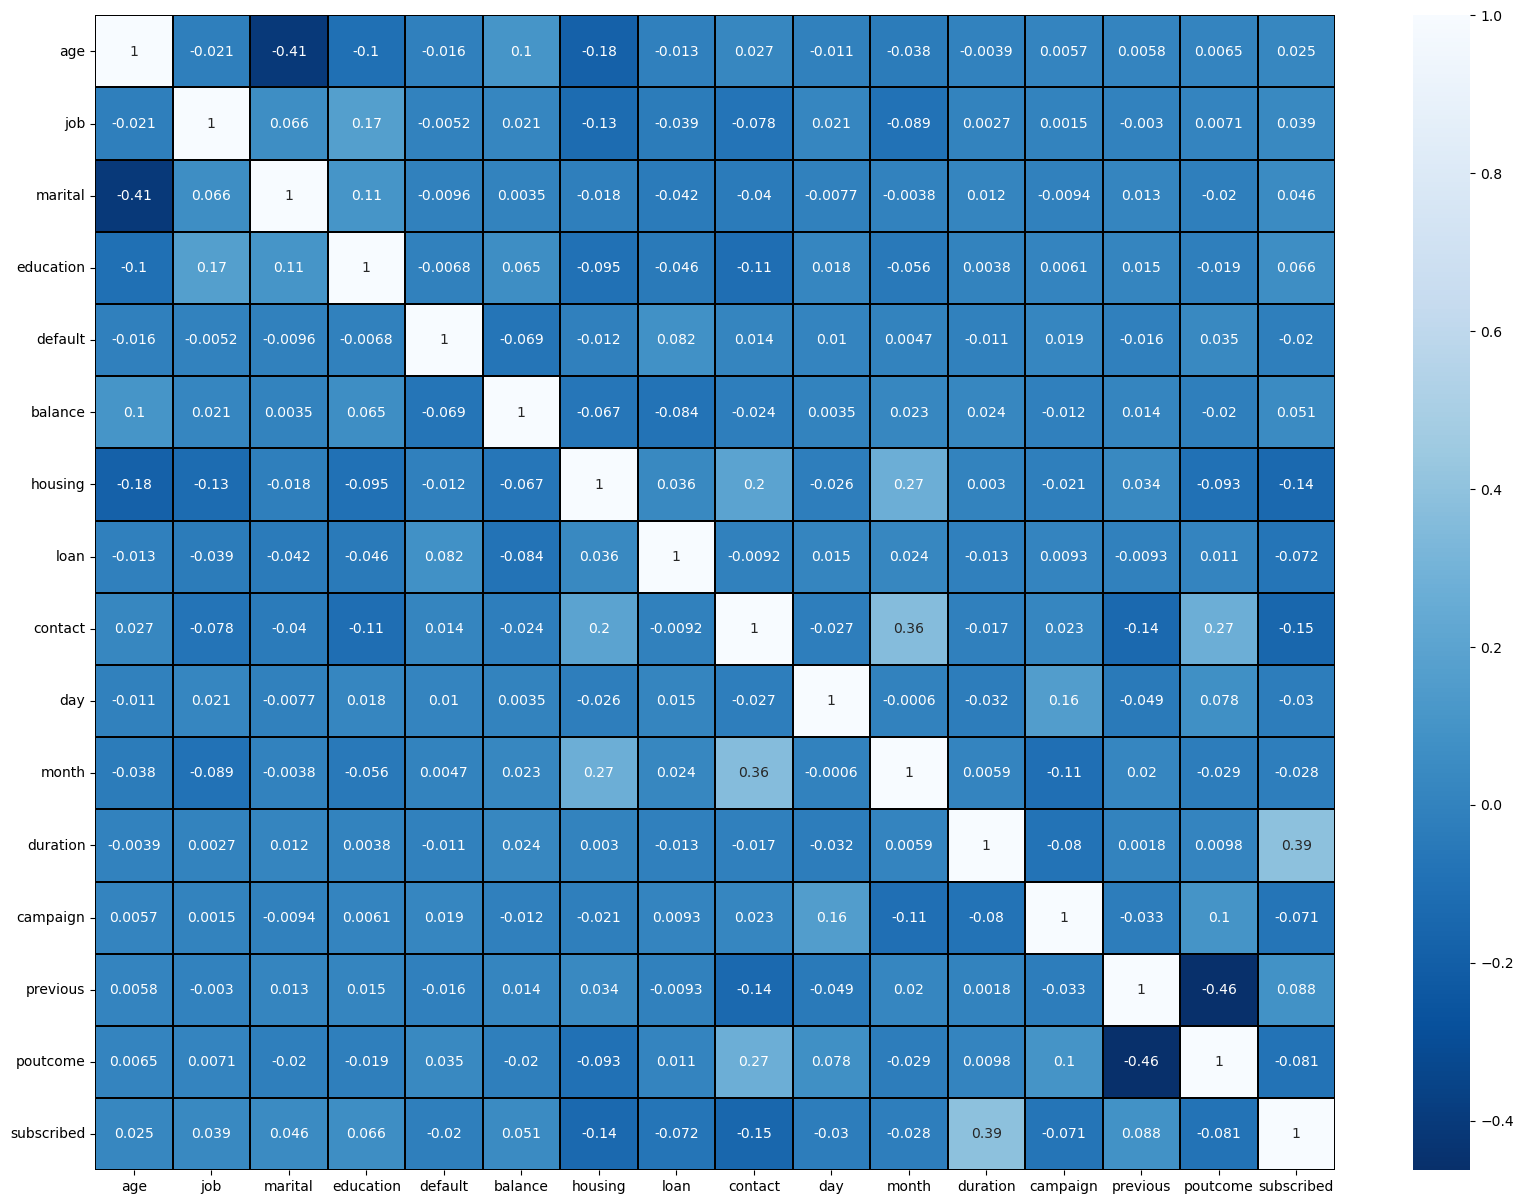

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [26]:
# Applying SMOTE

from imblearn.over_sampling import SMOTE

In [22]:
dfx=df.iloc[:,0:15]
dfx

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,3,2


In [23]:
dfy=df.iloc[:,-1]
dfy

0        3
1        3
2        3
3        3
4        3
        ..
13559    3
13560    3
13561    3
13562    2
13563    0
Name: poutcome, Length: 13564, dtype: int32

In [27]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [75]:
trainx.value_counts()

age  job  marital  education  default  balance  housing  loan  contact  day  month  duration  campaign  previous  poutcome
33   1    1        1          0        0        0        0     0        28   5      454       5         0         2           3
27   4    2        2          0        102      0        0     1        9    7      767       2         0         3           3
28   0    1        1          0        330      0        0     0        2    2      356       1         2         1           3
57   3    0        1          0        0        0        0     0        2    5      477       2         0         2           3
43   3    1        1          0        466      0        0     0        16   8      175       1         2         2           3
                                                                                                                             ..
34   10   0        2          1        75       1        0     2        2    6      31        3         0    

In [28]:
trainy.value_counts()

3    11030
0    11030
1    11030
2    11030
Name: poutcome, dtype: int64

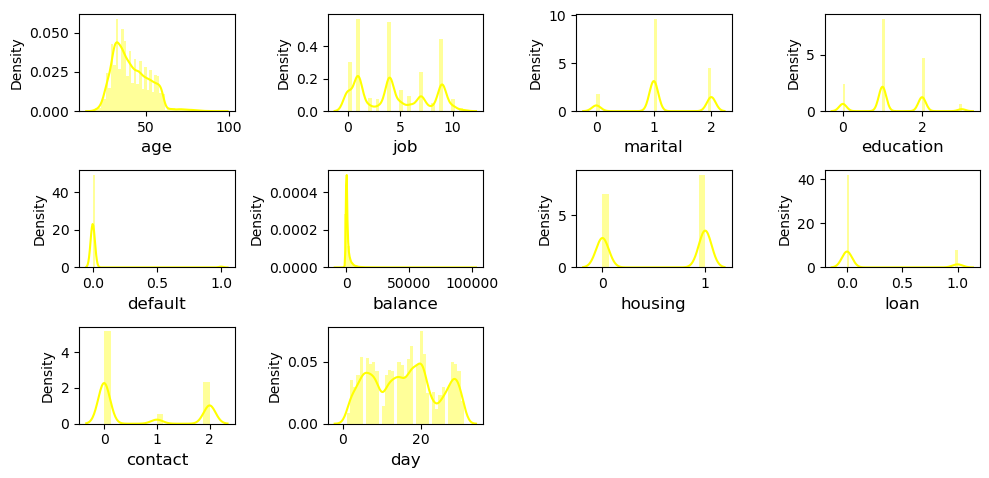

In [66]:
# Visualizing data distribution
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col],color='yellow')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()  

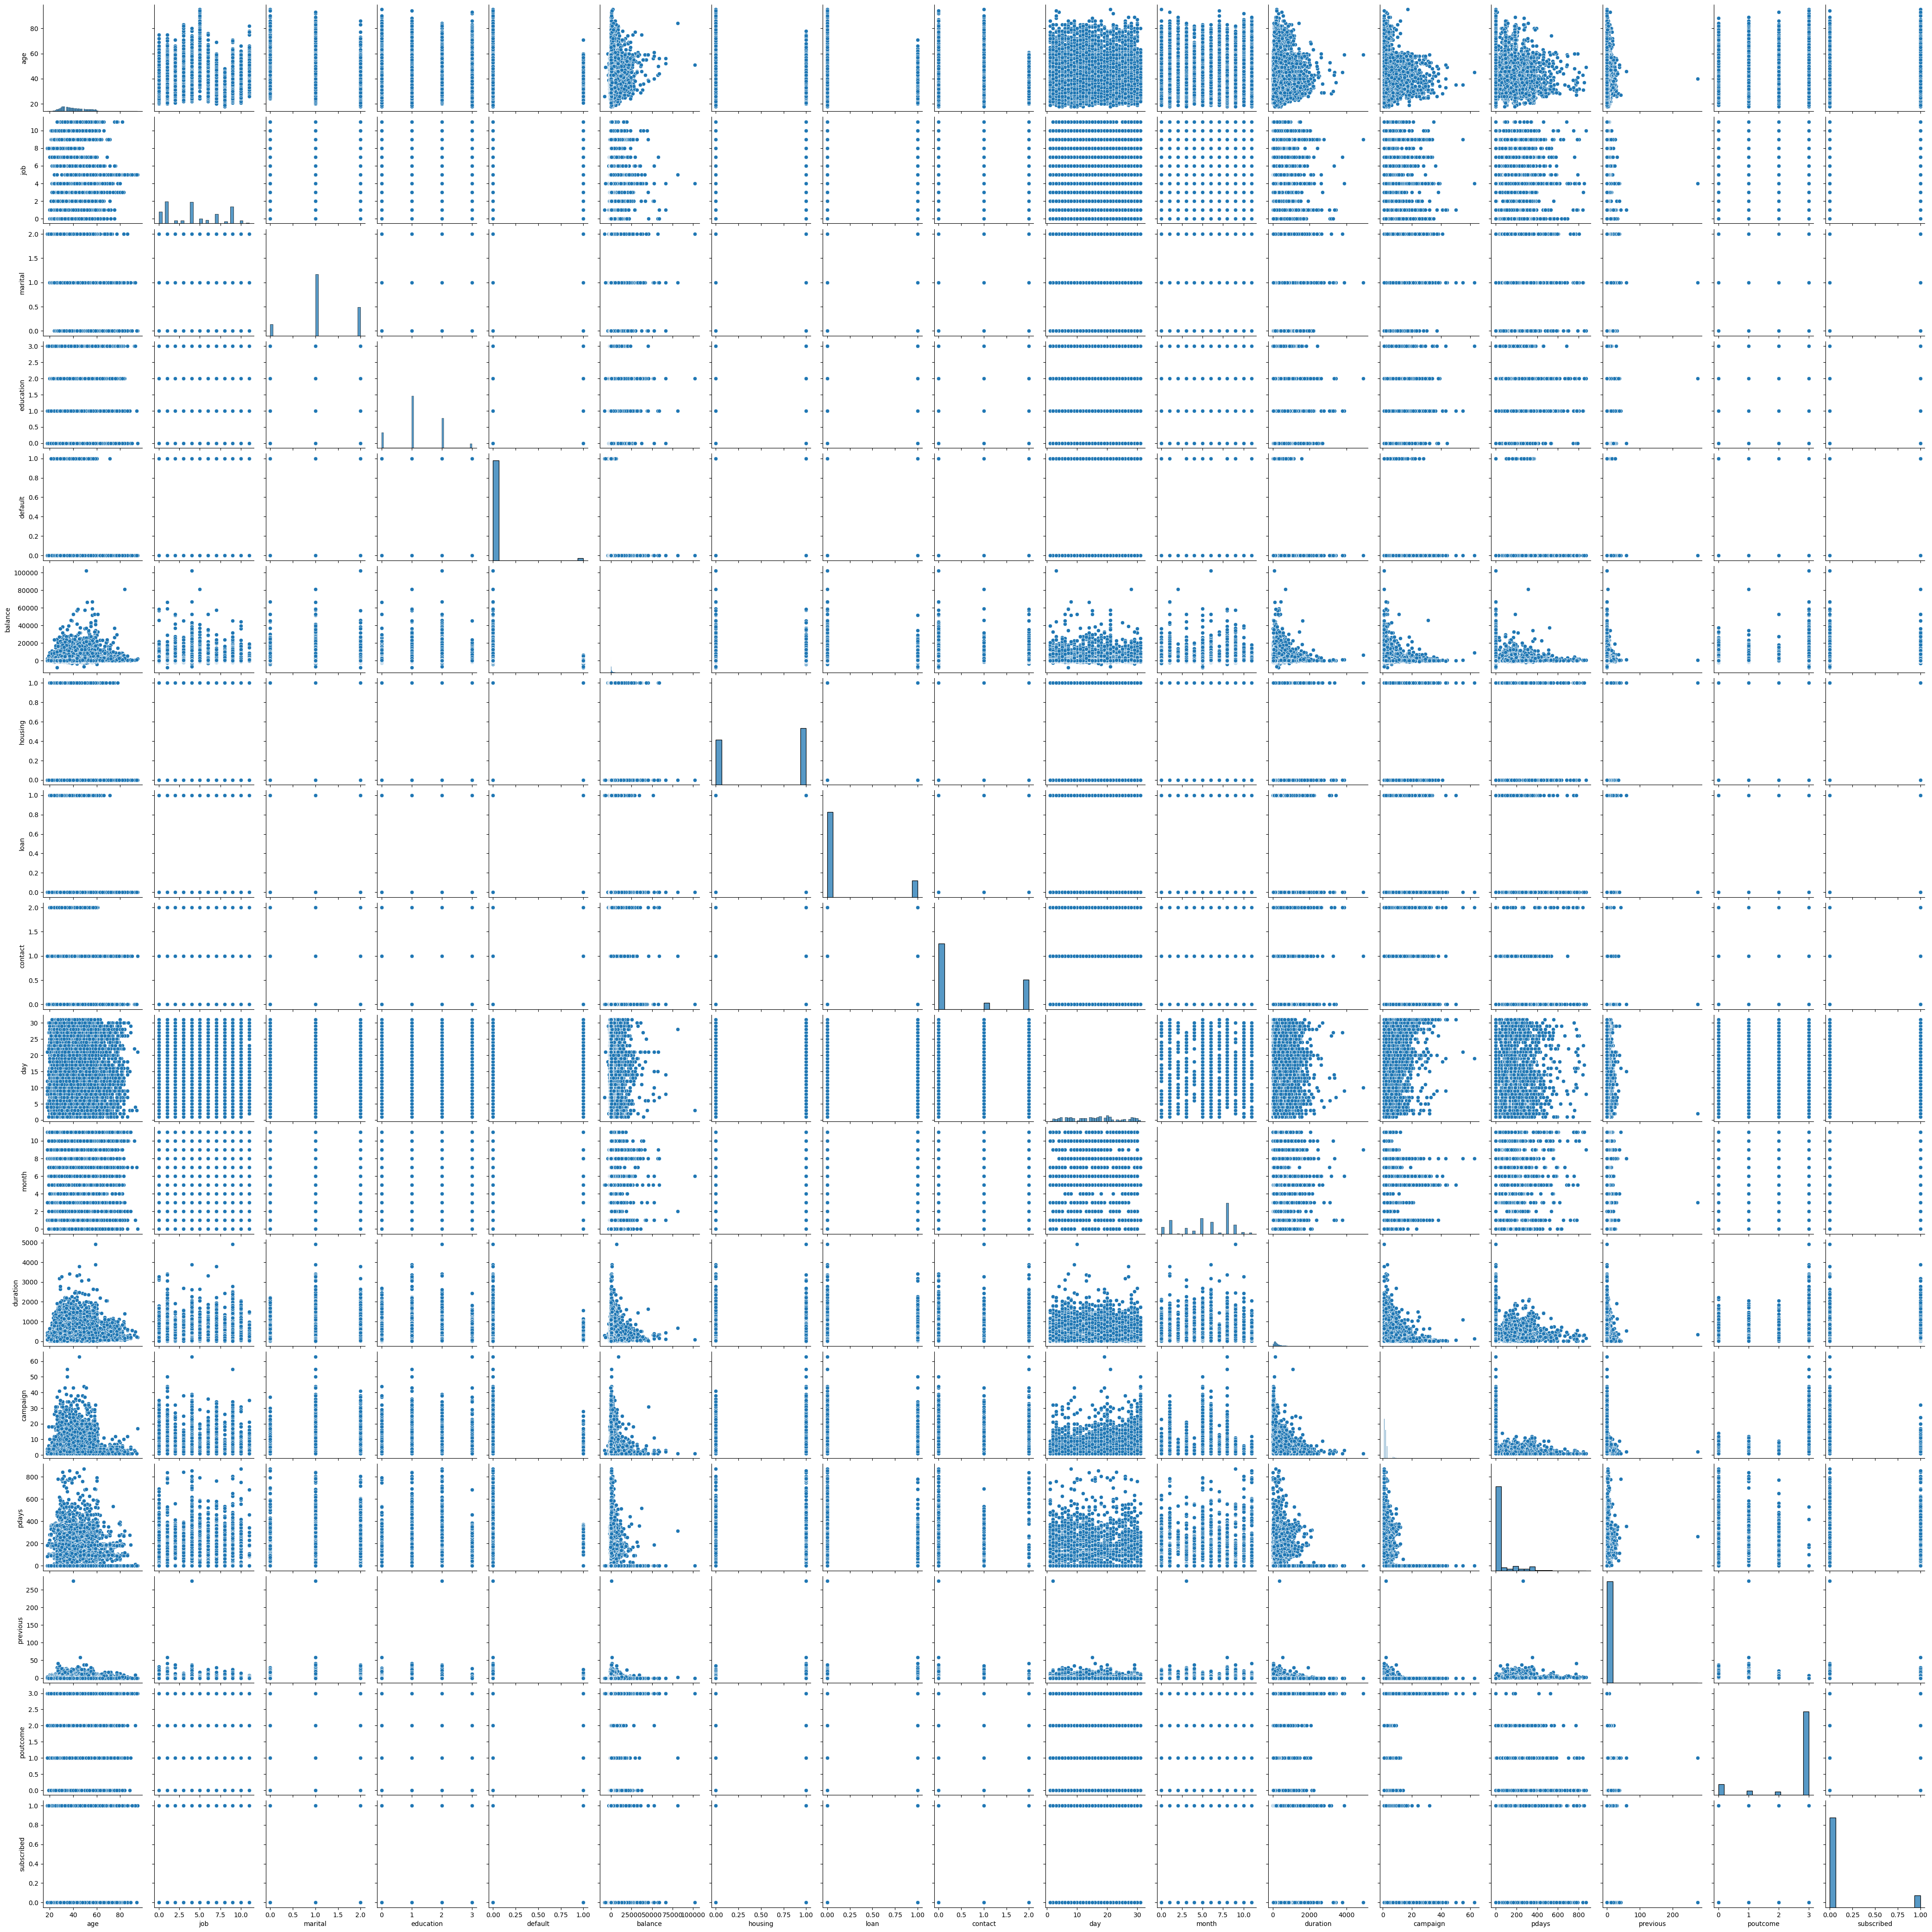

In [38]:
sns.pairplot(df)

In [29]:
x=trainx
y=trainy

# Finding Best Random State

In [40]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.9332935560859189 at random state  14


# Training & Testing of Data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [79]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,3
1,31,11,1,1,0,3,0,0,0,20,5,91,2,0,3
2,27,7,1,1,0,891,1,0,0,18,5,240,1,0,3
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,3,2
4,31,9,1,1,0,119,1,0,0,4,3,380,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55859,38,8,1,1,0,1000,0,0,0,7,7,237,2,3,2
55860,44,2,1,1,0,99,0,0,0,18,4,636,3,0,3
55861,45,6,1,1,0,1151,0,0,0,16,1,514,2,2,2
55862,56,1,1,1,0,157,0,0,0,17,2,876,1,5,2


In [80]:
y

0        0
1        0
2        0
3        1
4        0
        ..
55859    1
55860    1
55861    1
55862    1
55863    1
Name: subscribed, Length: 55864, dtype: int32

# Using various models

In [82]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8191527446300716
[[7033 1450]
 [1581 6696]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      8483
           1       0.82      0.81      0.82      8277

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760



In [83]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7301312649164677
[[6756 1727]
 [2796 5481]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8483
           1       0.76      0.66      0.71      8277

    accuracy                           0.73     16760
   macro avg       0.73      0.73      0.73     16760
weighted avg       0.73      0.73      0.73     16760



In [84]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6112768496420048
[[8195  288]
 [6227 2050]]
              precision    recall  f1-score   support

           0       0.57      0.97      0.72      8483
           1       0.88      0.25      0.39      8277

    accuracy                           0.61     16760
   macro avg       0.72      0.61      0.55     16760
weighted avg       0.72      0.61      0.55     16760



In [85]:
# Using KNN model:
# k =10

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8502386634844868
[[6336 2147]
 [ 363 7914]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.83      8483
           1       0.79      0.96      0.86      8277

    accuracy                           0.85     16760
   macro avg       0.87      0.85      0.85     16760
weighted avg       0.87      0.85      0.85     16760



In [86]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.900417661097852
[[7567  916]
 [ 753 7524]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8483
           1       0.89      0.91      0.90      8277

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760



In [36]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF.score(x_train,y_train)
predRF=RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

1.0
[[3369    0    0    0]
 [   0 3315    0    0]
 [   0    0 3219    0]
 [   0    0    0 3333]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3369
           1       1.00      1.00      1.00      3315
           2       1.00      1.00      1.00      3219
           3       1.00      1.00      1.00      3333

    accuracy                           1.00     13236
   macro avg       1.00      1.00      1.00     13236
weighted avg       1.00      1.00      1.00     13236



In [102]:
# Using Ada Boost Classifier:

from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
ABC.score(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8930190930787589
[[7512  971]
 [ 822 7455]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      8483
           1       0.88      0.90      0.89      8277

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760



In [90]:
from sklearn.model_selection import cross_val_score

In [93]:
# Checking CV score for LG
score=cross_val_score(lg,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predlg) - score.mean())

[0.76917569 0.79844267 0.82332408 0.80085921 0.79663444]
0.7976872215956906
Difference between Accuracy score and cross validation score is  0.021465523034380984


In [96]:
# Checking CV score for KNN
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predknn) - score.mean())

[0.85948268 0.85635013 0.86001969 0.85921418 0.86063373]
0.8591400811550555
Difference between Accuracy score and cross validation score is  -0.008901417670568623


In [97]:
# Checking CV score for DTC
score=cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,preddtc) - score.mean())

[0.81115188 0.91049852 0.91873266 0.91676363 0.92185822]
0.8958009819782864
Difference between Accuracy score and cross validation score is  -0.0027818888995274627


In [100]:
# Checking CV score for RandomForest
score=cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predRF) - score.mean())

[0.81401593 0.90996151 0.91909066 0.91694263 0.92176871]
0.8963558895320413
Difference between Accuracy score and cross validation score is  0.004002105694689062


In [103]:
# Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predABC) - score.mean())

[0.78269041 0.909156   0.90647096 0.91085653 0.90601504]
0.8830377877926716
Difference between Accuracy score and cross validation score is  0.009981305286087316


# Saving the model

In [37]:
import joblib
joblib.dump(RF,'Project_Term_Deposit.pkl')

['Project_Term_Deposit.pkl']

# Predicting the saved model

In [38]:
model=joblib.load('Project_Term_Deposit.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([3, 0, 0, ..., 3, 0, 2])

# Loading and Feature Engineering the Test Dataset

In [3]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_practise3/termdeposit_test.csv')

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
df.shape

(13564, 17)

In [6]:
# Removing not required column:
df=df.drop(columns=['ID'],axis=1)
df=df.drop(columns=['pdays'],axis=1)

In [7]:
df.shape

(13564, 15)

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
previous      int64
poutcome     object
dtype: object

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome'],
      dtype='object')

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
dtype: int64

In [11]:
# Encoding the columns

from sklearn.preprocessing import LabelEncoder

In [13]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome']].apply(LabelEncoder().fit_transform)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,0,3


In [15]:
df.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
previous     int64
poutcome     int32
dtype: object

In [16]:
x=df.iloc[:,:]

In [17]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,3,2


# Predecting whether the Client has subsribed or not using Random Forest Classifier as it gave best accuracy in Training models

In [39]:
model=joblib.load('Project_Term_Deposit.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([3, 0, 0, ..., 3, 0, 2])